In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\HP\AppData\Local\Temp\ipykernel_20776\880946714.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('Data\\Cleaned_Call_Conversation(Emotion).csv')

In [3]:
# splitted into independent and dependent variables

x = df['TextTranscripts'] 
y = df['label']

In [4]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [5]:
# TF-IDF Vectorization (converts the text data(comments) into numerical features)
vectorizer = TfidfVectorizer(max_features=10000)  
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [6]:
# Hyperparameter grid to search
#Grid search explores all possible combinations of these hyperparameters to find the optimal set
param_grid_rf = {
    'n_estimators': [100, 200, 300], # no of tress
    'max_depth': [None, 10, 20],  # maximum depth of trees
    'min_samples_split': [2, 5],  # minimum samples required to split a node
    'min_samples_leaf': [1, 2]    # minimum samples required at a leaf node
}

In [7]:
# Grid search with cross-validation on the training data to find the best hyperparameters for random forest
rf_classifier = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=3)
grid_search_rf.fit(X_train_tfidf, y_train)

# Best hyperparameters from the grid search
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters for Random Forest:", best_params_rf)

Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [8]:
# Train the final Random Forest model with the best hyperparameters
final_rf_classifier = RandomForestClassifier(**best_params_rf, random_state=42)
final_rf_classifier.fit(X_train_tfidf, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

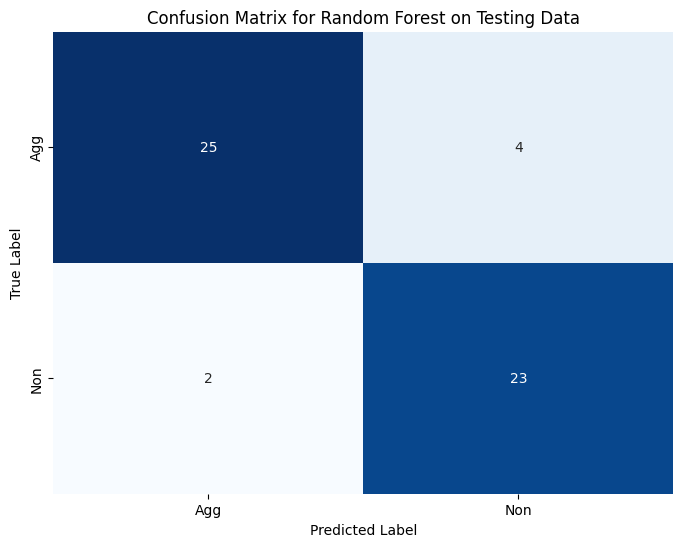

In [9]:
# Predict class labels on the testing dataset
y_pred_rf = final_rf_classifier.predict(X_test_tfidf)

# Compute the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=final_rf_classifier.classes_, 
            yticklabels=final_rf_classifier.classes_)
plt.title('Confusion Matrix for Random Forest on Testing Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [10]:
# Evaluate the final Random Forest model on the testing dataset
report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report for Random Forest on Testing Data:")
print(report_rf)

Classification Report for Random Forest on Testing Data:
              precision    recall  f1-score   support

         Agg       0.93      0.86      0.89        29
         Non       0.85      0.92      0.88        25

    accuracy                           0.89        54
   macro avg       0.89      0.89      0.89        54
weighted avg       0.89      0.89      0.89        54



In [11]:
# Get the accuracy score
accuracy_score(y_test, y_pred_rf)

0.8888888888888888